# Why Natural Langauge?

## 1. Natural Langauge is (almost) universal label (y), task (z) encoder.

The greatest advantage of language is its ability to represent a wide variety of Music Information Retrieval (MIR) labels and tasks in a unified space. Furthermore, with the advancement of language models, this unified space is not orthogonal (like one-hot encoding) but learns relative meanings from the huge corpora used in pre-training language models. This allows for a more nuanced and contextual representation of musical concepts and tasks. 

- This flexible ability to represent `tasks` and `labels` allows the music-language model to understand a wider variety of tasks simultaneously, rather than being limited to a single task, which enables it to become a more generalized model.

- Thanks to this ability, music-language models can possess the ability to solve out-of-vocabulary problems and handle novel classes.


While we will learn about the detailed development of language models in Chapter 2, let's briefly check an example of the advantages mentioned above using a pre-trained language model.
We can visualize through T-SNE that various models' labels and tasks can be expressed in language, and that they exist in the same space.

In [3]:
import warnings
warnings.filterwarnings('ignore')
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/sentence-t5-base')
y = ["rock music", "rap music", "classical music",  "130bpm", "120bpm" ,"55bpm", "piano", "electronic guitar", "acoustic guitar", "aggressive", "happy", "excited", "bright sound", "dark sound", "soft sound"]
z = ['genre', 'tempo', 'instrument', 'mood', 'timbre']
with torch.no_grad():
    embeddings = model.encode(y + z)
embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

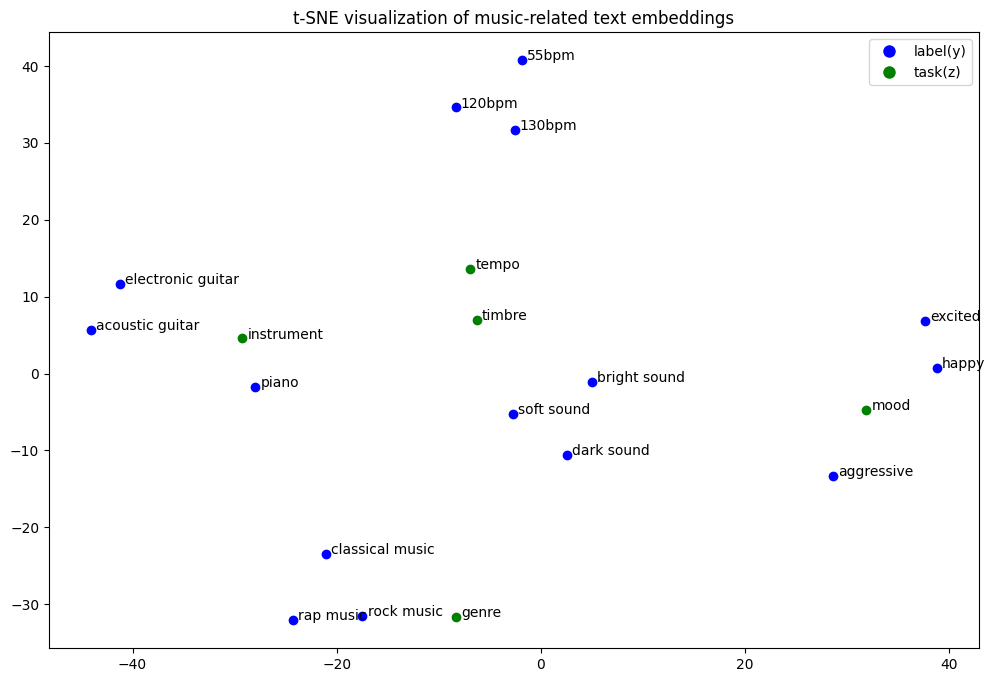

In [4]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_2d = tsne.fit_transform(embeddings)
plt.figure(figsize=(12, 8))
colors = {'label(y)': 'blue', 'task(z)': 'green'}
for i, text in enumerate(y + z):
    color = colors['label(y)'] if i < len(y) else colors['task(z)']
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c=color)
    plt.annotate(text, (embeddings_2d[i, 0] + 0.5, embeddings_2d[i, 1]))
plt.title("t-SNE visualization of music-related text embeddings")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=cat, markerfacecolor=color, markersize=10) for cat, color in colors.items()])
plt.show()

## 2. Natural Langauge is (weak but scalable) supervision for representation learning

Although it's not within the scope of this tutorial (which focuses on annotation, retrieval, and generation tasks), music-language models can become powerful representation learners by using high-level semantic information as supervision. Models trained on noisy but scalable music-text pairs can perform well on downstream tasks. For example, in the vision domain, models like CLIP (Contrastive Language-Image Pre-training) {cite}`radford2021learning` and CoCa (Contrastive Captioners are Image-Text Foundation Models) {cite}`yu2022coca` actually report excellent performance on multiple downstream tasks. In the music domain, the MuLaP {cite}`manco2022learning`, TTMR {cite}`doh2023toward`, and MuLan {cite}`huang2022mulan` papers demonstrate that Music-Language models can be powerful representation learners.

## 3. Natural Langauge is effective interface.

Language serves as an effective interface for AI models, (i.e., ChatGPT and Stable Diffusion). Because it leverages natural, intuitive communication methods. Language allows users to express complex queries, requests, or ideas in a flexible and contextually rich way without needing specialized knowledge. In terms of responses, language can also enable the system to generate human-like intentions or answers, which can positively impact user satisfaction and usability.